# Trabajo Práctico 1
## Business Analytics / Aplicaciones Computacionales en Negocios
### Amigo, Caracoix, Marsili y Sanson

#### Setup del entorno, carga de los datos y armado de funciones básicas

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as plt
import random
import math

from typing import List, Tuple

In [7]:
# Cargamos el dataset de viento
datos = pd.read_excel('wind_data.xlsx')

La funcion $\theta$ esta definida como:

$$
\theta(i) = 6 + 2cos(2πi/365)
$$

In [8]:
def theta_function(i):
    return 6 + 2 * np.cos(2 * np.pi * i / 365)

El error en la regresión lineal, conocido como RMSE (raiz del error cuadratico medio o root mean squared error), está definido como:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

In [9]:
def calcular_RMSE(Y, predicciones):

    n = len(Y)

    residuos = Y - predicciones
    varianza = np.sum(residuos**2) / n

    return np.sqrt(varianza)

##### Por último, establecemos parámetros básicos que nos van a acompañar durante todo el trabajo

In [10]:
N = 10000 # Cantidad de simulaciones/iteraciones que se haran en cada ejercicio

T = 365 # Período en el cual se realizará el análisis

k_inicial = 5 # La media a ojo del viento

C = 200000 # Costo de arreglo inicial

# Ejercicio 1

### Regresion Lineal para el modelo del viento regional

Vamos a estimar los parámetros $\kappa$ y $\sigma$ para el regresion_vientoo de velocidad del viento regional utilizando un regresion_vientoo de regresion lineal.

La ecuación original es:

$$
S_{i+1} = S_i + \kappa (\theta(t_i) - S_i) \Delta + \sigma \sqrt{\Delta} Z_i
$$

Despejamos $S_i$ para obtener una forma adecuada para la regresión lineal:

$$
S_{i+1} - S_i = \kappa \Delta (\theta(t_i) - S_i) + \sigma \sqrt{\Delta} Z_i
$$

Reescribimos la ecuación en términos de $\beta$:

$$
Y = \beta_1 X  + \epsilon_i
$$

donde:
- $Y = S_{i+1} - S_i$
- $\beta_1 = \kappa \Delta$
- $\epsilon_i = \sigma \sqrt{\Delta} Z_i$

Luego, generamos las columnas correspndientes en nuestro dataset: 

In [11]:
datos['Y'] = datos['regional wind'].diff()  # Calcula la diferencia entre días consecutivos

# Preparar X, que es theta_i - S_i 
datos['X'] = theta_function(datos["dia"]) - datos['regional wind'].shift(1)

# Eliminar los valores nulos generados por diff() y shift()
datos = datos.dropna(subset=['Y', 'X'])

In [12]:
Y = datos['Y'] # Variable a predecir
X = datos[['X']] # Variable predictora

regresion_viento = LinearRegression()
regresion_viento.fit(X, Y)

B0 = regresion_viento.intercept_
B1 = regresion_viento.coef_[0]

delta = 1/T

#Estimamos kappa
kappa_estimado = B1 / delta

#Estimamos sigma
predicciones = regresion_viento.predict(X)

error = calcular_RMSE(Y,predicciones)

sigma_estimado = error / np.sqrt(delta)

print(f"kappa estimado: {kappa_estimado}")
print(f"sigma estimado: {sigma_estimado}")

kappa estimado: 108.73826243919804
sigma estimado: 16.046573595261595


Utilizamos la desviación estándar de los residuos para calcular el error estándar de los parámetros estimados:

Primero necesitábamos obtener necesitamos una estimación de la desviación estándar de \( Y \) que se calcula de la siguiente manera: 
$$
\sigma_Y \approx \sqrt{\frac{1}{N} \sum_{i=1}^{N} (Y(X_i))^2 - \left( \frac{1}{N} \sum_{i=1}^{N} Y(X_i) \right)^2}
$$

Pero esta fórmula se puede sustituir con el calculo utilizando la función auxiliar `calcular_RMSE`. 


Luego, calculamos efectivamente lso errores de estimación para cada uno de los parámetros:

$$
SE = 1.96 \frac{\sigma_h}{\sqrt{N}}
$$

In [13]:
# Desviación de estimación de kappa y sigma
N_reg = len(Y)
SE_kappa = 1.96 * error / np.sqrt(N)
SE_sigma = 1.96 * error / np.sqrt(N)

print(f"Error estándar de kappa: {SE_kappa}")
print(f"Error estándar de sigma: {SE_sigma}")

Error estándar de kappa: 0.01646235457091417
Error estándar de sigma: 0.01646235457091417


### Regresion Lineal para el modelo de diferencia de la velocidad del viento entre el norte y el sur

Vamos a estimar los parámetros $\beta$ y $\gamma$ para el regresion_vientoo de diferencia de la velocidad del viento entre el norte y el sur utilizando un modelo de regresion lineal.

La ecuación original es:

$$
D_{i+1} = D_i - \beta D_i \Delta + \gamma \sqrt{\Delta} W_i
$$

Despejamos $D_i$ para obtener una forma adecuada para la regresión lineal:

$$
D_{i+1} - D_i = - \beta \Delta D_i  + \gamma \sqrt{\Delta} W_i
$$

Reescribimos la ecuación en términos de $\beta$:

$$
H = \beta_1 G  + \epsilon_i
$$

donde:
- $H = D_{i+1} - D_i$
- $\beta_1 = -\beta \Delta$
- $\epsilon_i = \gamma \sqrt{\Delta} W_i$

Repetimos el mismo proceso que realizamos antes:

In [14]:
# Preparar H
datos['H'] = datos['wind gap norte sur'].diff()

# Eliminar los valores nulos generados por diff()
datos = datos.dropna(subset = ('H'))

In [15]:
G = datos[['wind gap norte sur']]
H = datos['H']

regresion_gap = LinearRegression()
regresion_gap.fit(G,H)

B0_2 = regresion_gap.intercept_
B1_2 = regresion_gap.coef_[0]

#Estimamos beta
beta_estimado = -B1_2 / delta

#Estimamos gamma

predicciones_gap = regresion_gap.predict(G)

error_gap = calcular_RMSE(H,predicciones_gap)

gamma_estimado = error_gap / np.sqrt(delta)

print(f"beta estimado: {beta_estimado}")
print(f"gamma estimado: {gamma_estimado}")

beta estimado: -48.37880318325385
gamma estimado: 10.091915756839064


Utilizamos la desviación estándar de los residuos para calcular el error estándar de los parámetros estimados de igual manera que los parámetros anteriores:

In [16]:
# Desviación de estimación de beta y gamma
N_gap = len(H)
SE_beta = 1.96 * error_gap / np.sqrt(N_gap)
SE_gamma = 1.96 * error_gap / np.sqrt(N_gap)

print(f"Error estándar de beta: {SE_beta}")
print(f"Error estándar de gamma: {SE_gamma}")

Error estándar de beta: 0.017141776994051224
Error estándar de gamma: 0.017141776994051224


# Ejercicio 2

##### Creamos funciones básicas para simular el viento y el gap, y una función para realizar N simulaciones

In [17]:
def generar_viento_regional(kappa, sigma, T):
    camino_viento = np.zeros(T)
    # Tomamos el primer valor de los datos históricos para utilizarlo como primer valor del viento en el instante 0.
    camino_viento[0] = datos['regional wind'].iloc[0]

    # Luego simularemos al viento desde el instante 1 (segundo valor) hasta T (medida temporal que se quiera calcular)
    for i in range(1, T):
        Z = np.random.normal(0, 1)
        # Calcula el siguiente valor del camino del viento
        # Usamos la fórmula Mean Reverting Process. El viento tiende a regresar a un valor promedio (representado por theta).
        camino_viento[i] = camino_viento[i-1] + kappa * (theta_function(i) - camino_viento[i-1]) * 1/T + sigma * np.sqrt(1/T) * Z

    return camino_viento

def generar_gap_norte_sur(beta, gamma, T):
    camino_gap = np.zeros(T)
    # Tomamos el primer valor de los datos históricos para utilizarlo como primer valor de la diferencia entre el viento norte y sur en el instante 0.
    camino_gap[0] = datos['wind gap norte sur'].iloc[0]

    for i in range(1, T):
        W = np.random.normal(0, 1)
        camino_gap[i] = camino_gap[i-1] + beta * 1/T * camino_gap[i-1] + gamma * np.sqrt(1/T) * W

    return camino_gap

# Recibe una cantidad N y un período T, y devuelve 
def generar_simulaciones(N,T):
    
    n_caminos = []

    for i in range(N):
        simular_viento = generar_viento_regional(kappa_estimado, sigma_estimado, T)
        simular_gap = generar_gap_norte_sur(beta_estimado, gamma_estimado, T)

        camino_norte = simular_viento - simular_gap / 2
        camino_sur = simular_viento + simular_gap / 2

        n_caminos.append((camino_norte,camino_sur))

    print("Simulaciones generadas exitosamente")
        
    return n_caminos


In [18]:
N_simulaciones = generar_simulaciones(N,T)

simulacion_regional = generar_simulaciones(1,T)

simulacion_norte = simulacion_regional[0][0]

simulacion_sur = simulacion_regional[0][1]

Simulaciones generadas exitosamente
Simulaciones generadas exitosamente


$$
\text{Simulación Norte} = S_i + \frac{D_i}{2}
$$

$$
\text{Simulación Sur} = S_i - \frac{D_i}{2}
$$

Luego, si tomamos el promedio:

$$
\frac{\left(S_i + \frac{D_i}{2}\right) + \left(S_i - \frac{D_i}{2}\right)}{2} = S_i
$$

Simplificando:

$$
\frac{S_i + \frac{D_i}{2} + S_i - \frac{D_i}{2}}{2} = \frac{2S_i}{2} = S_i
$$

### Grafico comparativo del viento regional real vs el simulado

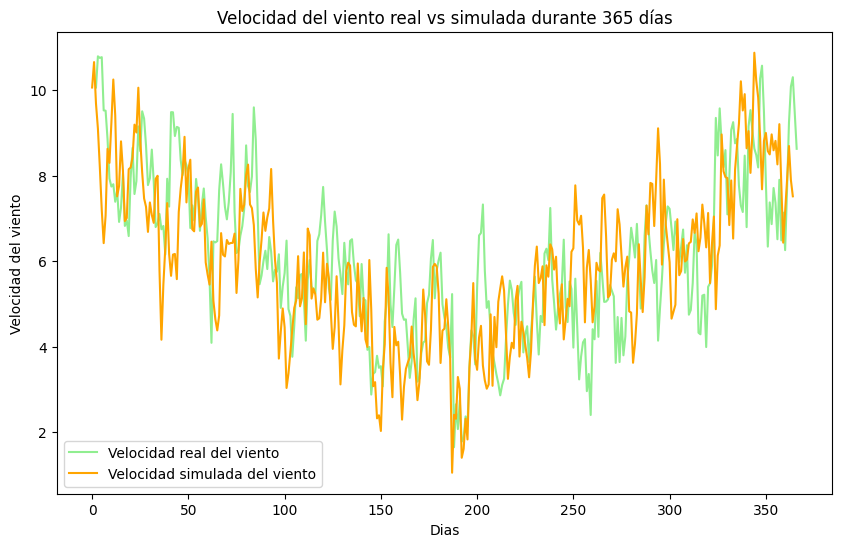

In [19]:
import matplotlib.pyplot as plt

simular_viento = (simulacion_norte + simulacion_sur) / 2

# Graficar la velocidad del viento
plt.figure(figsize=(10, 6))
plt.plot(datos['regional wind'][:T], color='lightgreen', label='Velocidad real del viento')
plt.plot(simular_viento, color='orange', label='Velocidad simulada del viento')

# Añadir etiquetas y título
plt.xlabel('Dias')
plt.ylabel('Velocidad del viento')
plt.title('Velocidad del viento real vs simulada durante 365 días')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Vemos que en el largo plazo, hay una correlacion positiva entre ambos, por lo que resulta razonable pensar que el camino simulado se parece al camino real

### Grafico comparativo de la diferencia de velocidad del viento entre el norte y el sur real vs la simulada

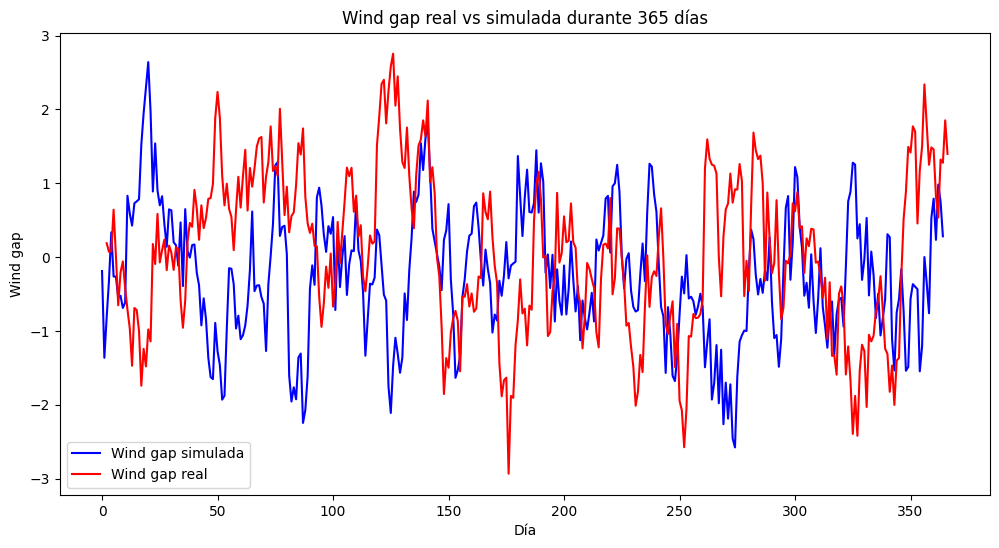

In [20]:
simular_gap = simulacion_norte - simulacion_sur

# Graficar las simulaciones
plt.figure(figsize=(12, 6))
plt.plot(simular_gap, color='blue', label='Wind gap simulada')
plt.plot(datos["wind gap norte sur"][:T], color='red', label='Wind gap real')

plt.xlabel('Día')
plt.ylabel('Wind gap')
plt.title('Wind gap real vs simulada durante 365 días')
plt.legend()
plt.show()


### Gráfico comparativo de la velocidad simulada del viento para los molinos norte y sur

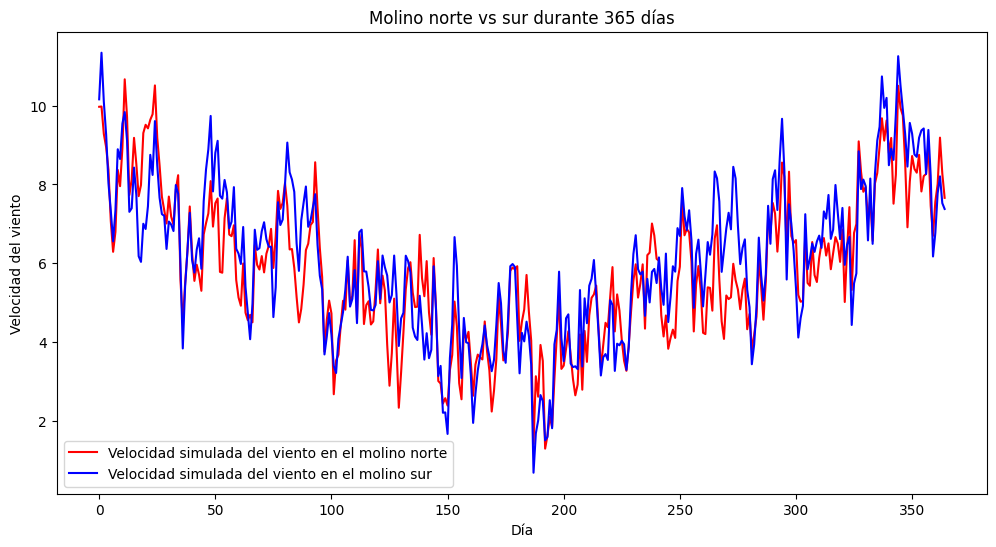

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(simulacion_norte, color='red', label='Velocidad simulada del viento en el molino norte')
plt.plot(simulacion_sur, color='blue', label='Velocidad simulada del viento en el molino sur')

plt.xlabel('Día')
plt.ylabel('Velocidad del viento')
plt.title('Molino norte vs sur durante 365 días')
plt.legend()
plt.show()

Si bien hay periodos dentro del corto plazo donde la correlacion no es positiva, en el largo plazo ambos caminos se expanden de la misma manera, con correlación positiva

# Ejercicio 3

In [22]:
def simular_rotura(p):
    # Devuelve 1 si el número aleatorio entre 0 y 1 es menor a la probabilidad de que el molino se rompa. 
    return 1 if random.uniform(0,1) < p else 0

def calcular_VAN(T, viento, k, costo_arreglo):
    delta = 1/T
    S = viento
    activo = False
    VAN = 0
    VAN_diario = []

    estado_molino = []
    rotura = []
    
    # Para cada día en la velocidad del viento:
    for i in range(0, T):

        cashflow = 0

        tasa_descuento = math.e**-((0.05 * i)/365)

        probabilidad_rotura = 0.25*(S[i]**2)*delta
        # Si el molino está prendido: 
        if(activo):
            # Calculamos si el molino en el día i supera la probabilidad provista
            esta_roto = simular_rotura(probabilidad_rotura)

            if(S[i] >= k):
                    activo = False
                    cashflow -= 1000
                    rotura.append(0)
            else:
                if(esta_roto):
                    cashflow -= costo_arreglo
                    activo = False
                    rotura.append(1)

                else:
                    rotura.append(0)
                    cashflow += 1000 * S[i]
            
        else:
            # Si el viento volvió a estar por debajo del nivel del umbral, lo puedo volver a prender. 
            # Mi negocio vuelve a funcionar, tengo rendimientos positivos. 

            if(S[i] < k):
                activo = True
                cashflow += 1000 * S[i]
        
            rotura.append(0)

        cashflow = cashflow * tasa_descuento

        VAN = VAN + cashflow

        VAN_diario.append(VAN)
        
        estado_molino.append(activo)
    
    return VAN_diario, estado_molino, rotura

def simular_ambos_molinos(sim_norte, sim_sur, T, k) -> List:

    VAN_molino_norte,estados_molino_norte,roturas_molino_norte = calcular_VAN(T,sim_norte,k,C)

    info_molino_norte = (VAN_molino_norte,estados_molino_norte,roturas_molino_norte)

    VAN_molino_sur,estados_molino_sur,roturas_molino_sur = calcular_VAN(T, sim_sur,k,C)

    info_molino_sur = (VAN_molino_sur,estados_molino_sur,roturas_molino_sur)

    return [info_molino_norte, info_molino_sur]

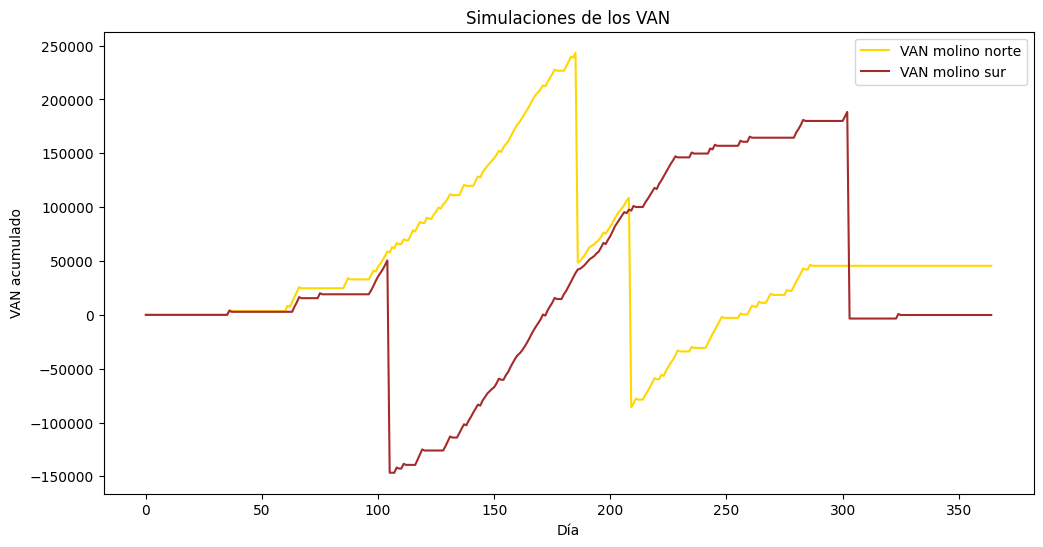

In [23]:
simulacion_ambos_molinos = simular_ambos_molinos(simulacion_norte,simulacion_sur, T, k_inicial)

simular_VAN_molino_norte = simulacion_ambos_molinos[0][0]

simular_VAN_molino_sur = simulacion_ambos_molinos[1][0]

# Graficar las simulaciones
plt.figure(figsize=(12, 6))
plt.plot(simular_VAN_molino_norte, color='gold', label='VAN molino norte')
plt.plot(simular_VAN_molino_sur, color='brown', label='VAN molino sur')

plt.xlabel('Día')
plt.ylabel('VAN acumulado')
plt.title('Simulaciones de los VAN')
plt.legend()
plt.show()

Las fluctuaciones en ambas líneas del gráfico indican los días en que los molinos generan ganancias o pérdidas. Las ganancias se producen cuando los molinos están operativos y el viento está por debajo del umbral crítico, permitiendo así un funcionamiento eficiente y obtener una ganancia. Por otro lado, las caídas observadas en el VAN acumulado se deben a dos factores principales: roturas del molino o apagados preventivos.

# Ejercicio 4

Grafico de la evolución contemporánea del estado de cada molino

In [24]:
def graficar_estado_molino(sim,roturas,encendido,region,k):
    # Datos ya calculados: simulacion_norte (velocidad del viento), simular_encendido_norte (estado de encendido) y simular_rotura_norte (roturas)
    dias = np.arange(len(sim))

    # Graficar la velocidad del viento
    plt.figure(figsize=(10, 6))
    plt.plot(dias, sim, color='orange', label='Velocidad simulada del viento', linewidth=0.85)

    # Graficar línea verde o roja según el valor de simular_encendido_norte
    for i in range(len(sim) - 1):
        if encendido[i] == 1:  # Encendido (True)
            plt.plot([dias[i], dias[i+1]], [sim[i], sim[i+1]], color='green', linewidth=2)
        else:  # Apagado (False)
            plt.plot([dias[i], dias[i+1]], [sim[i], sim[i+1]], color='red', linewidth=2)

    # Graficar roturas con puntos en la posición donde ocurre una rotura (simular_rotura_norte == 1)
    rotura_indices = np.where(np.array(roturas) == 1)[0]
    plt.scatter(rotura_indices, np.array(sim)[rotura_indices], color='blue', label=f'Rotura molino {region}', zorder=5)

    # Graficar línea horizontal en y = 9
    plt.axhline(y=k, color='black', linestyle='--', label='Umbral de apagado')

    # Añadir etiquetas y título
    plt.xlabel('Días')
    plt.ylabel('Velocidad del viento')
    plt.title('Velocidad del viento real vs simulada con estado de encendido y roturas')

    # Añadir leyenda con colores personalizados
    legend_labels = ['Encendido (verde)', 'Apagado (rojo)', f'Rotura molino {region}', 'Umbral de apagado']
    legend_colors = ['green', 'red', 'blue', 'black']
    handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
    plt.legend(handles, legend_labels)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

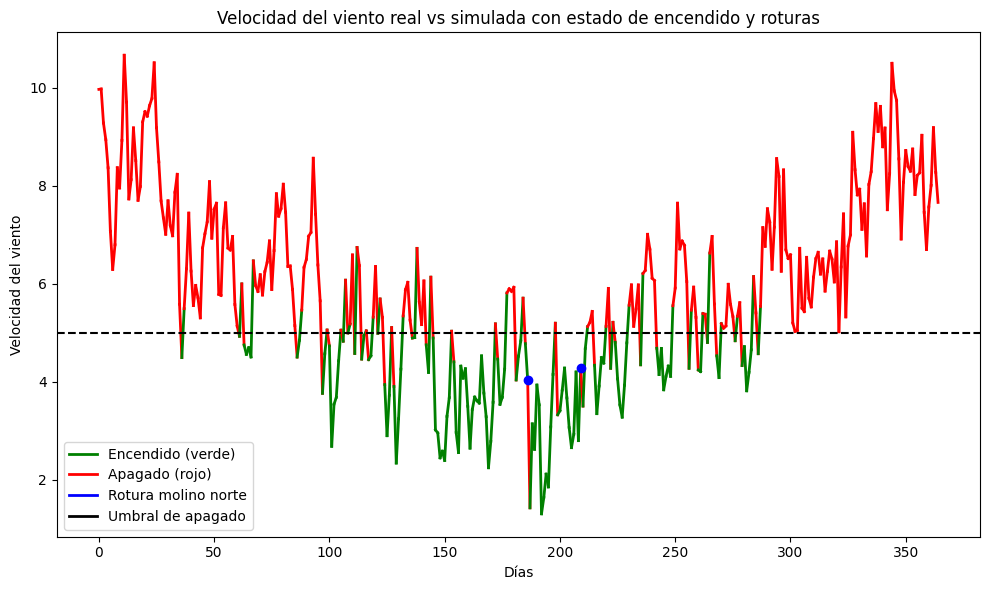

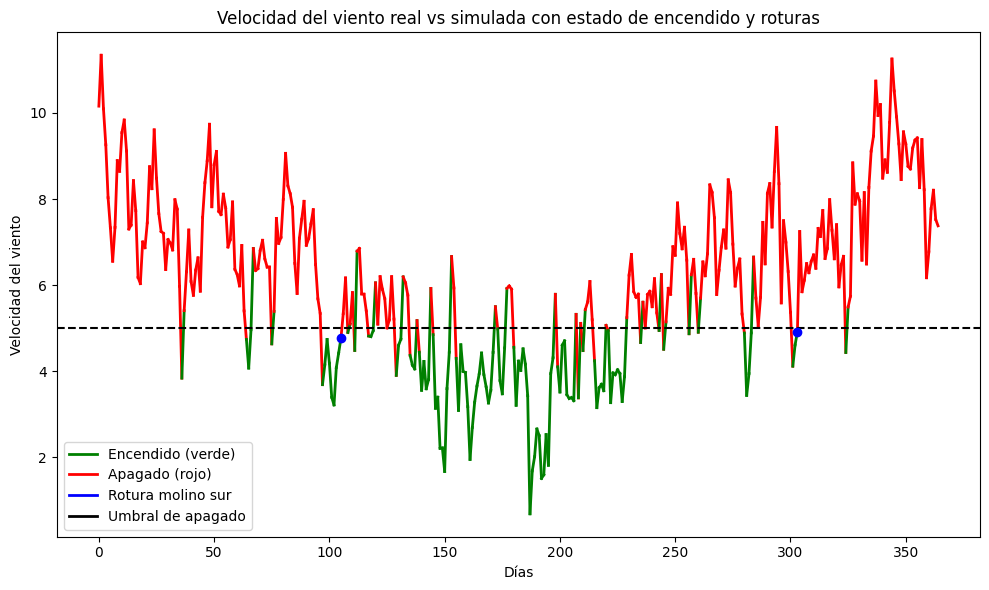

In [25]:
simular_encendido_norte = simulacion_ambos_molinos[0][1]

simular_rotura_norte = simulacion_ambos_molinos[0][2]

simular_norte = simulacion_ambos_molinos[0][0]

simular_encendido_sur = simulacion_ambos_molinos[1][1]

simular_rotura_sur = simulacion_ambos_molinos[1][2]

simular_sur = simulacion_ambos_molinos[1][0]

graficar_estado_molino(simulacion_norte,simular_rotura_norte,simular_encendido_norte,"norte", k_inicial)

graficar_estado_molino(simulacion_sur,simular_rotura_sur,simular_encendido_sur,"sur", k_inicial)


En el gráfico podemos observar como las 3 simulaciones se expanden de manera simetrica a traves del tiempo, esto nos lleva a pensar que los modelos implementados anteriormente son fieles a los datos proporcionados, mostrando una correlacion de largo plazo positiva.

# Ejercicio 5

El VAN esperado se calcula como el promedio de los VANs simulados:
$$
\text{VAN esperado} = \frac{1}{N} \sum_{j=1}^N \text{VAN}_j
$$

donde:
- N es el número total de simulaciones.
- $\text{VAN}_j$ es el VAN del j-ésimo camino simulado.


In [26]:
def VAN_esperado(k, N, T, simulaciones):

    simulaciones_regionales = []

    for i in range(N):

        VAN_norte = calcular_VAN(T, simulaciones[i][0], k, C)[0][-1]
        VAN_sur = calcular_VAN(T, simulaciones[i][1], k, C)[0][-1]

        VAN_total = VAN_norte + VAN_sur

        simulaciones_regionales.append(VAN_total)

    VAN_esperado = np.mean(simulaciones_regionales)

    return (VAN_esperado, simulaciones_regionales)

In [27]:
def estimar_error_muestral(datos):

    # Calcular la desviación estándar de los datos
    desviacion_estandar = np.std(datos, ddof=1)  # ddof=1 para obtener la desviación estándar muestral

    # Calcular el error estándar
    error_estandar = 1.96 * desviacion_estandar / np.sqrt(len(datos))

    return error_estandar

Decidimos implementar la funcion de estimar error para un conjunto de datos generico y no para el VAN esperado unicamente ya que luego la vamos a querer utilizar para estimar otros errores muestrales usando la misma formula

# Ejercicio 6

### Optimización del Umbral de Viento k para Maximizar el VAN

Queremos encontrar el valor del umbral de viento k que maximiza el Valor Actual Neto (VAN) generado por los molinos de viento en un año. Para ello, vamos utilizar simulaciones de Monte Carlo siguiendo estos pasos:

1. Definir un rango de valores de k
2. Implementar la simulación para calcular el VAN esperado para cada valor de k para N simulaciones.
3. Comparar los VANs obtenidos y seleccionar el k óptimo que maximice el VAN esperado.


In [28]:
umbrales = np.arange(6, 10, 0.1)
lista_VANs_total = []

for k in umbrales:

    VAN_esperado_dado_k = VAN_esperado(k, N, T, N_simulaciones)[0]
    lista_VANs_total.append((VAN_esperado_dado_k, k))

k_optimo = max(lista_VANs_total, key=lambda x: (x[0], x[1]))[1]  # Max en función de [VAN, k], solo devuelve k

print(f"El valor óptimo de k es: {k_optimo}")

El valor óptimo de k es: 7.299999999999995


# Ejercicio 7

Calculamos el VAN esperado para 10000 simulaciones (Monte Carlo) para ver a donde converge en cada tipo de operacion:

- Operacion optima: utilizando k_optimo
- Operacion ingenua: utilizando k >> k_optimo (nunca se apaga el molino)

(Nota: Como puede variar el resultado del ejercicio anterior, seteamos el umbral a un valor fijo)

Luego comparamos los resultados

In [29]:
k_ingenuo = 1000
print(f"K-optimo: {k_optimo}")

VAN_ingenuo = VAN_esperado(k_ingenuo, N, T, N_simulaciones)
VAN_optimo = VAN_esperado(k_optimo, N, T, N_simulaciones)

VAN_esperado_ingenuo = VAN_ingenuo[0]
VAN_esperado_optimo = VAN_optimo[0]

error_ingenuo = estimar_error_muestral(VAN_ingenuo[1])
error_optimo = estimar_error_muestral(VAN_optimo[1])

print(f"VAN esperado con K-ingenuo: {VAN_esperado_ingenuo:.0f} USD")
print(f"VAN esperado con K-optimo: {VAN_esperado_optimo:.0f} USD")

print(f"Error de estimación del VAN esperado con K-ingenuo: {error_ingenuo:.0f} USD")
print(f"Error de estimación del VAN esperado con K-optimo: {error_optimo:.0f} USD")

K-optimo: 7.299999999999995
VAN esperado con K-ingenuo: 412474 USD
VAN esperado con K-optimo: 868061 USD
Error de estimación del VAN esperado con K-ingenuo: 16327 USD
Error de estimación del VAN esperado con K-optimo: 11226 USD


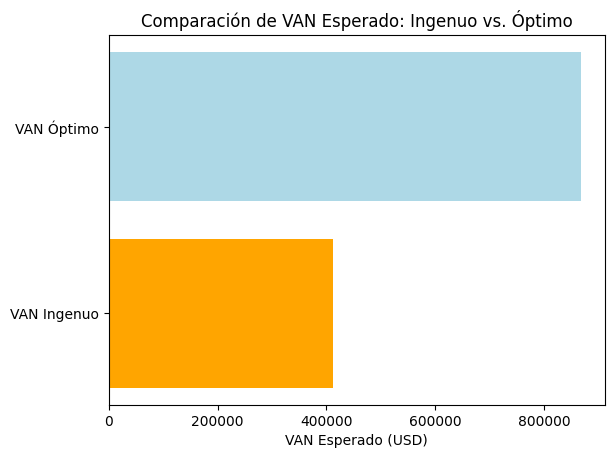

In [30]:
import matplotlib.pyplot as plt

# Nombres de las categorías
categorias = ['VAN Ingenuo', 'VAN Óptimo']

# Colores correspondientes a cada barra
colores = ['orange', 'lightblue']

# Crear gráfico de barras horizontal
plt.barh(categorias, [VAN_esperado_ingenuo, VAN_esperado_optimo], color=colores)

# Añadir etiquetas
plt.xlabel('VAN Esperado (USD)')
plt.title('Comparación de VAN Esperado: Ingenuo vs. Óptimo')

# Mostrar gráfico
plt.show()

# Ejercicio 8

Al ingreso del mes de Agosto lo podemos medir como el ingreso entre los días 213 (1 de Agosto) y 243 (31 de Agosto) de nuestro modelo.

Primero, implementamos una funcion para calcular el VAN sin comtemplar la tasa de descuento diaria:

In [31]:
def calcular_ingresos(T, viento, k):

    delta = 1/T
    S = viento
    activo = False
    VAN = 0
    VAN_diario = []
    estado_molino = []

    for i in range(0, T):

        probabilidad_rotura = 0.25*(S[i]**2)*delta

        if(activo):
            
            
            if(S[i] >= k):
                    activo = False

            else:  

                esta_roto = simular_rotura(probabilidad_rotura)

                if(esta_roto):
                    activo = False
                
                else:
                    VAN += 1000 * S[i]
        
        else:

            if(S[i] < k):
                activo = True
                VAN += 1000 * S[i]
        
        estado_molino.append(activo)

        VAN_diario.append(VAN)
    
    return VAN_diario, estado_molino

A traves de Monte Carlo, calculamos los ingresos de agosto para 10000 simulaciones distintas para despues poder graficar la distribucion del mismo

In [32]:
ingresos_agosto = []

for i in range(N):

    viento_norte_agosto = N_simulaciones[i][0][213:244]
    viento_sur_agosto = N_simulaciones[i][1][213:244]

    ingreso_norte_agosto = calcular_ingresos(len(viento_norte_agosto),viento_norte_agosto,k_optimo)[0][-1]
    ingreso_sur_agosto = calcular_ingresos(len(viento_sur_agosto),viento_sur_agosto,k_optimo)[0][-1]

    ingresos_agosto.append(ingreso_norte_agosto + ingreso_sur_agosto)


print(f"Media de ingresos en Agosto sin descuento: {np.mean(ingresos_agosto):.0f} USD")
print(f"Estimación de error muestral: {estimar_error_muestral(ingresos_agosto):.0f} USD")

Media de ingresos en Agosto sin descuento: 230631 USD
Estimación de error muestral: 386 USD


Graficamos la distribucion de los ingresos de agosto a traves de un histograma de frecuencia

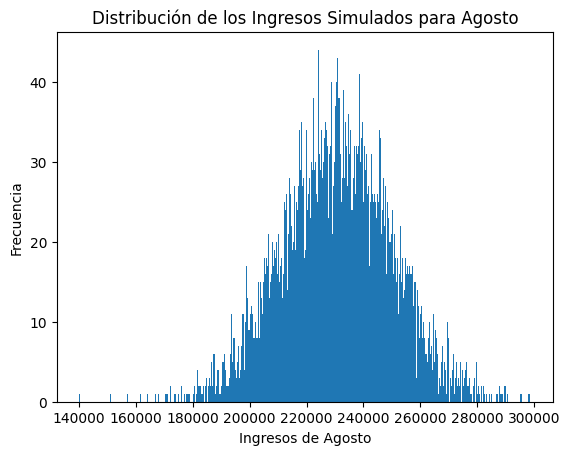

In [33]:
plt.hist(ingresos_agosto, bins = 1000)
plt.xlabel('Ingresos de Agosto')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Ingresos Simulados para Agosto')
plt.show()

Podemos observar que la distribucion del ingreso de agosto tiene una forma que se aproxima a una campana de Gauss, lo cual es un primer indicio de que puede presentar una distribucion normal

# Ejercicio 9

In [34]:
roturas_agosto_k_optimo = []

roturas_agosto_k_ingenuo = []

for i in range(N):
    
    s_norte = N_simulaciones[i][0]

    s_sur = N_simulaciones[i][1]

    info_k_optimo = simular_ambos_molinos(s_norte, s_sur, T, k_optimo)

    info_k_ingenuo = simular_ambos_molinos(s_norte, s_sur, T, N)

    rotura_k_optimo = sum(info_k_optimo[0][2]) + sum(info_k_optimo[1][2])

    rotura_k_ingenuo = sum(info_k_ingenuo[0][2]) + sum(info_k_ingenuo[1][2])

    roturas_agosto_k_ingenuo.append(rotura_k_ingenuo)
    roturas_agosto_k_optimo.append(rotura_k_optimo)


print(f"Roturas promedio del molino con k-ingenuo: {np.mean(roturas_agosto_k_ingenuo)/2:.0f}")
print(f"Roturas promedio del molino con k-óptimo: {np.mean(roturas_agosto_k_optimo)/2:.0f}")

print(f"Estimación de error de roturas promedio del molino con k-ingenuo: {estimar_error_muestral(roturas_agosto_k_ingenuo)}")
print(f"Estimación de error de roturas promedio del molino con k-optimo: {estimar_error_muestral(roturas_agosto_k_optimo)}")

Roturas promedio del molino con k-ingenuo: 10
Roturas promedio del molino con k-óptimo: 4
Estimación de error de roturas promedio del molino con k-ingenuo: 0.08372381121799273
Estimación de error de roturas promedio del molino con k-optimo: 0.05713162243953743


# Ejercicio 10

In [35]:
actividad_norte = []

actividad_sur = []

for i in range(N):

    s_norte = N_simulaciones[i][0]

    s_sur = N_simulaciones[i][1]

    info_ambos_molinos = simular_ambos_molinos(s_norte, s_sur, T, k_optimo)

    estado_norte = sum(info_ambos_molinos[0][1])

    estado_sur = sum(info_ambos_molinos[1][1])

    actividad_norte.append(estado_norte)
    actividad_sur.append(estado_sur)

print(f"Cantidad promedio de días que el molino norte está inactivo: {365 - np.mean(actividad_norte):.0f}")
print(f"Cantidad promedio de días que el molino sur está inactivo: {365 - np.mean(actividad_sur):.0f}")

Cantidad promedio de días que el molino norte está inactivo: 103
Cantidad promedio de días que el molino sur está inactivo: 103


Vemos que, en promedio, ambos molinos estan apagados durante 81 dias del año. Es decir, durante aproximadamente un 22% del año, los molinos no generan ingresos.

In [36]:
error_estimacion_norte = estimar_error_muestral(actividad_norte)
error_estimacion_sur = estimar_error_muestral(actividad_sur)

print(f"Error de estimación de la actividad del molino norte: {error_estimacion_norte}")
print(f"Error de estimación de la actividad del molino norte: {error_estimacion_sur}")

Error de estimación de la actividad del molino norte: 0.2799603076170365
Error de estimación de la actividad del molino norte: 0.27970466123353394


In [37]:
def estimar_error_proporcion(p, N):
    
    res = np.sqrt(p*(1-p)/N)

    return res

# Ejercicio 11

Para estimar la probabilidad de que ambos molinos estén inactivos el 9 de julio, podemos usar Monte Carlo:

$$
P(\text{inactividad en algún día del año}) = \frac{1}{N} \sum_{i=1}^{N} \mathbb{I}(N_{189} = 0 \cap S_{189} = 0)
$$

Donde:

- $N_{189}$ es el estado del molino norte en el día 189 del año (9 de julio)
- $S_{189}$ es el estado del molino sur en el día 189 del año (9 de julio)
- $N$ es la cantidad de simulaciones


Por otro lado, el error de estimación de $\hat{p}$ se puede calcular como:

$$
SE = \sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{N}}
$$

donde:

- $\hat{p}$ es la estimación de la proporcion deseada
- $N$ es el número de simulaciones

In [38]:
coincidencias_9_julio = 0

for i in range(N):

    s_norte = N_simulaciones[i][0]

    s_sur = N_simulaciones[i][1]

    simulacion_regional = simular_ambos_molinos(s_norte, s_sur, T, k_optimo)

    estado_norte = simulacion_regional[0][1]

    estado_sur = simulacion_regional[1][1]

    if(estado_norte[189] == 0 and estado_sur[189] == 0):
            coincidencias_9_julio += 1

probabilidad_inactividad_9_julio = coincidencias_9_julio/10000

print(f'Probabilidad de que ambos molinos estén inactivos el 9 de julio: {probabilidad_inactividad_9_julio:.10f}')

SE_9_julio = estimar_error_proporcion(probabilidad_inactividad_9_julio, N)

print(f'Error estándar de la probabilidad: {SE_9_julio:.10f}')

Probabilidad de que ambos molinos estén inactivos el 9 de julio: 0.0020000000
Error estándar de la probabilidad: 0.0004467662


Podemos observar que la probabilidad de ambos molinos esten inactivos el 9 de julio es cercana a 0, lo que lo convierte en un evento bastante improbable. Esto se puede deber a la media estacional de dicho mes, la cual es baja, por lo que es muy poco probable que ese dia el viento supere el umbral k y, por lo tanto, se apague.

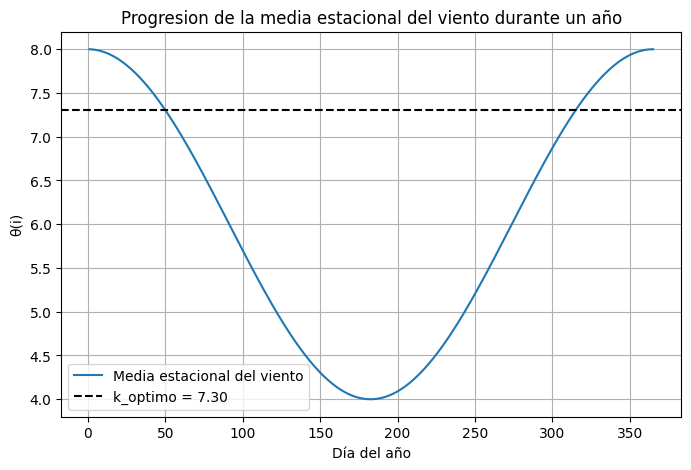

In [39]:
i_values = np.arange(1, 366)
theta_values = theta_function(i_values)

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.plot(i_values, theta_values, label= 'Media estacional del viento')
plt.axhline(y=k_optimo, color='black', linestyle='--', label=f'k_optimo = {k_optimo:.2f}')
plt.title('Progresion de la media estacional del viento durante un año')
plt.xlabel('Día del año')
plt.ylabel('θ(i)')
plt.grid(True)
plt.legend()
plt.show()

Para estimar la probabilidad de que ambos molinos estén inactivos en algún día del año, podemos usar Monte Carlo:

$$
P(\text{inactividad en algún día del año}) = \frac{1}{N} \sum_{i=1}^{N} \mathbb{I}(N_{i} = 0 \cap S_{i} = 0)
$$

Donde:

- $\mathbb{I}$ es la función indicadora que toma el valor 1 si ambos molinos están inactivos en el día $i$ y 0 en caso contrario.
- $N_{i}$ es el estado del molino norte en el día $i$.
- $S_{i}$ es el estado del molino sur en el día $i$.
- $N$ es la cantidad de simulaciones

In [80]:
cantidad_coincidencias = 0

for i in range(N):

    s_norte = N_simulaciones[i][0]

    s_sur = N_simulaciones[i][1]

    simulacion_regional = simular_ambos_molinos(s_norte, s_sur, T, k_optimo)

    estado_norte = simulacion_regional[0][1]

    estado_sur = simulacion_regional[1][1]

    for j in range(T):
        if(estado_norte[j] == 0 and estado_sur[j] == 0):
            cantidad_coincidencias += 1
            break

probabilidad_inactividad = 1/N * cantidad_coincidencias
print(f'Probabilidad de que ambos molinos estén inactivos en algun dia del año: {probabilidad_inactividad}')

SE = estimar_error_proporcion(probabilidad_inactividad, N)
print(f'Error estándar de la probabilidad: {SE}')

Probabilidad de que ambos molinos estén inactivos en algun dia del año: 1.0
Error estándar de la probabilidad: 0.0


Si vemos nuevamente el grafico de la progresion de la media estacional, podremos observar que a principios de año la media es alta en comparacion al umbral optimo, por lo que habra muchos dias en los que tengamos que apagar ambos molinos, dada la similitud de los vientos. Habiendo dicho eso, resulta logico pensar que ambos molinos se apaguen el mismo dia en al menos un dia del año, con lo que la probabilidad será de 1

# Ejercicio 12

In [41]:
def calcular_correlacion(X, Y):
    # Calcular las medias
    media_X = np.mean(X)
    media_Y = np.mean(Y)
    
    # Calcular las desviaciones estándar
    desvio_X = np.sqrt(np.sum((X - media_X)**2))
    desvio_Y = np.sqrt(np.sum((Y - media_Y)**2))
    
    # Calcular la covarianza
    covarianza = np.sum((X - media_X) * (Y - media_Y))
    
    # Calcular la correlación
    correlacion = covarianza / (desvio_X * desvio_Y)
    
    return correlacion

In [42]:
ingresos_mayo_norte = []
ingresos_mayo_sur = []

for i in range(N):
    
    s_norte = N_simulaciones[i][0]

    s_sur = N_simulaciones[i][1]
    
    # Calcular el VAN diario para mayo (días 121 a 151 del año)
    ingreso_norte = calcular_ingresos(T, s_norte, k_optimo)[0]
    ingreso_sur = calcular_ingresos(T, s_sur, k_optimo)[0]
    
    # Sumar los ingresos diarios para mayo (días 121 a 151)
    ingreso_mensual_norte = ingreso_norte[151] - ingreso_norte[121]

    ingreso_mensual_sur = ingreso_sur[151] - ingreso_sur[121]
    
    # Guardar los totales en listas
    ingresos_mayo_norte.append(ingreso_mensual_norte)
    ingresos_mayo_sur.append(ingreso_mensual_sur)

correlacion = calcular_correlacion(ingresos_mayo_norte, ingresos_mayo_sur)

print(f'Correlación del ingreso mensual de mayo entre los dos molinos: {correlacion}')

Correlación del ingreso mensual de mayo entre los dos molinos: 0.3275114902844305


# Ejercicio 13

La sensibilidad se puede calcular utilizando diferencias finitas de la siguiente manera:

$$
\frac{\partial E[f(\alpha, S_T)]}{\partial \alpha} \approx \frac{E[f(\alpha + \epsilon, S_T)] - E[f(\alpha - \epsilon, S_T)]}{2\epsilon}
$$

Donde:
- $\alpha$ es el parámetro de interés.
- $\epsilon$ es un pequeño incremento.
- $E[f(\alpha, S_T)]$ es el valor esperado de la función \( f \) con el parámetro $\alpha$ y el proceso estocástico \( S_T \).

Para calcular esta sensibilidad, se realizan simulaciones para $\alpha$ + $\epsilon$ y $\alpha$ - $\epsilon$, y se utiliza la fórmula de diferencias finitas para estimar la derivada.

In [67]:
def VAN_esperado_modificado(k, N, T, costo_arreglo,sims):
    simulaciones = sims

    simulaciones_regionales = []

    for i in range(N):
        
        camino_norte = simulaciones[i][0]
        camino_sur = simulaciones[i][1]

        VAN_norte, _, _ = calcular_VAN(T, camino_norte, k, costo_arreglo)
        VAN_sur, _, _ = calcular_VAN(T, camino_sur, k, costo_arreglo)

        simulaciones_regionales.append(VAN_norte[-1] + VAN_sur[-1])

    VAN_esperado = np.mean(simulaciones_regionales)
    return VAN_esperado

def calcular_sensibilidad(costo_arreglo_actual, costo_arreglo_nuevo, N, T, k, simulaciones):

    # Calcular VAN esperado para el costo de arreglo actual
    VAN_esperado_actual = VAN_esperado_modificado(k, N, T, costo_arreglo_actual,simulaciones)
    
    # Calcular VAN esperado para el nuevo costo de arreglo
    VAN_esperado_nuevo = VAN_esperado_modificado(k, N, T, costo_arreglo_nuevo,simulaciones)
    
    # Calcular la sensibilidad utilizando la fórmula de diferencias finitas
    sensibilidad = (VAN_esperado_nuevo - VAN_esperado_actual) / (costo_arreglo_nuevo - costo_arreglo_actual)
    
    return sensibilidad

In [44]:
costo_arreglo_actual = 200000  # Costo viejo
costo_arreglo_nuevo = 250000   # Nuevo costo

sensibilidad = calcular_sensibilidad(costo_arreglo_actual, costo_arreglo_nuevo, N, T, k_optimo, N_simulaciones)

print(f"La sensibilidad calculada es: {sensibilidad}")

La sensibilidad calculada es: -8.407532507008995


#### Análisis extra

In [45]:
umbrales = np.arange(5, 12, 0.1)

# Gráfico del cambio del VAN y el umbral óptimo para costos entre 0 y 500 mil dólares
costos_arreglo = np.linspace(0, 500000, 19)
VANs_esperados = []
umbrales_optimos = []

for costo in costos_arreglo:

    lista_VANs_total = []

    VAN_esperado_dado_k = VAN_esperado_modificado(k_optimo, N, T, costo, N_simulaciones)

    lista_VANs_total.append((VAN_esperado_dado_k, k_optimo))
    
    VANs_esperados.append(max(lista_VANs_total)[0])


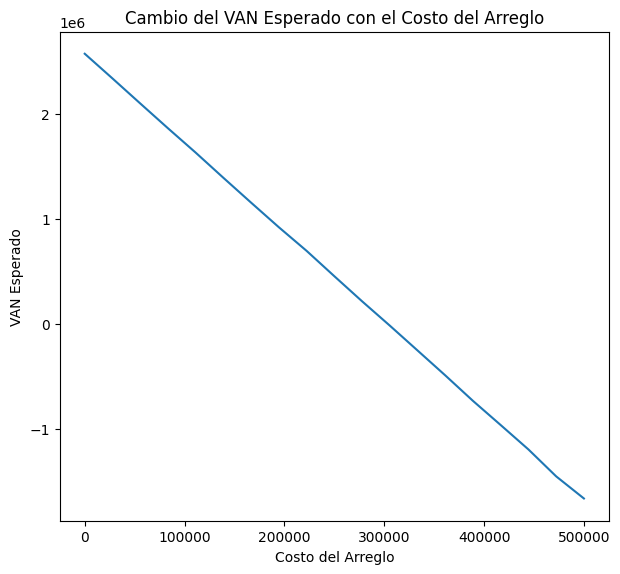

In [46]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(costos_arreglo, VANs_esperados)
plt.xlabel('Costo del Arreglo')
plt.ylabel('VAN Esperado')
plt.title('Cambio del VAN Esperado con el Costo del Arreglo')

plt.tight_layout()
plt.show()

In [47]:
umbrales = np.arange(6, 12, 0.1)

lista_VANs_norte = []
lista_VANs_sur = []
lista_VANs_total = []

# Llenar las listas con las tuplas de [VAN, k]
for k in umbrales:

    VAN_esperado_dado_k = VAN_esperado_modificado(k,N,T,250000,N_simulaciones)

    lista_VANs_total.append((VAN_esperado_dado_k,k))

# Encontrar el valor de k más alto considerando VAN y luego k
k_optimo_costo_250 = max(lista_VANs_total, key=lambda x: (x[0], x[1]))[1]  # Max en función de [VAN, k]

print(f"El valor óptimo de k es: {k_optimo_costo_250}")

El valor óptimo de k es: 6.199999999999999


Como se observa en el gráfico, hay una relación inversamente proporcional negativa entre el costo de arreglo y el ingreso mensual esperado, a medida que aumenta el costo, disminuye el ingreso esperado. Esto indica que cualquier incremento en los costos de reparación tiene un impacto negativo considerable en la rentabilidad del negocio. Particularmente, la pendiente de la recta que muestra la relación entre VAN esperado y costo de arreglo es igual a la sensibilidad -0.5, esto es, por cada dólar que aumenta el costo, disminuye el VAN esperado en 0.5 dólares

Dado que el costo de reparación es ahora más alto, el umbral óptimo para la reparación debería disminuir. Esto significa que deberíamos considerar reparar el molino antes de que se produzcan daños más graves y costosos. Al reducir el umbral, minimizamos el riesgo de enfrentarnos a reparaciones extremadamente costosas.

# Ejercicio 14

Graficamos la media estacional a lo largo del año y el VAN esperado para 10000 simulaciones. Con el fin de mejorar la visualización, dividimos el VAN por un número grande para apreciar de manera mas clara cómo varía en el mismo gráfico que la media estacional.

In [48]:
van_total = [0] * T 

for i in range(N):

    simulacion_norte = N_simulaciones[i][0]
    simulacion_sur = N_simulaciones[i][1]
    
    simulacion_ambos_molinos = simular_ambos_molinos(simulacion_norte,simulacion_sur,T,k_optimo)

    simular_VAN_molino_norte = simulacion_ambos_molinos[0][0]

    simular_VAN_molino_sur = simulacion_ambos_molinos[1][0]

    van_total = [van_total[i] + (simular_VAN_molino_norte[i] + simular_VAN_molino_sur[i])/2 for i in range(T)]  # Suma los VAN diarios

# Calcula el promedio dividiendo cada elemento de van_total por el número de simulaciones (x)
van_esperado = [total / N for total in van_total]

# Re-escalamos que se aprecie en el grafico (por tema escalas)
van_esperado = [van / 50000 for van in van_esperado]

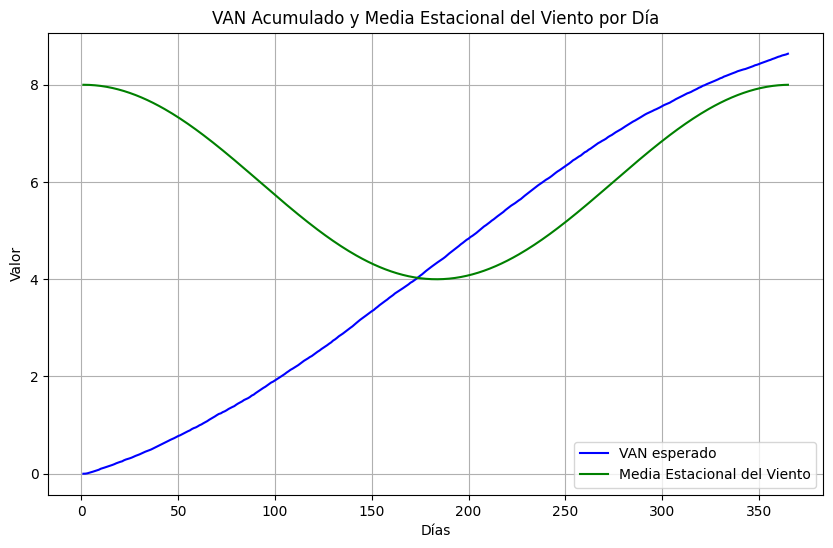

In [49]:
# Graficamos el VAN_esperado junto con la media del viento

media_viento = [] #valor de la media en dia i 

for i in range(T):
    media_viento.append(theta_function(i))

dias = range(1, T+1)  # Días (eje x)

plt.figure(figsize=(10, 6))

# Graficar el VAN acumulado
plt.plot(dias, van_esperado, label="VAN esperado", color="b")

# Graficar la media del viento
plt.plot(dias, media_viento, label="Media Estacional del Viento", color="g")

# Añadir etiquetas y leyenda
plt.xlabel("Días")
plt.ylabel("Valor")
plt.title("VAN Acumulado y Media Estacional del Viento por Día")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Ejercicio 14 hecho por MARIANO GOD

In [50]:
def media_estacional(i, variacion):
    return 6 + variacion + 2 * np.cos(2 * np.pi * i / 365)


def S(kappa, sigma, T, theta):
    camino_viento = np.zeros(T)
    # Tomamos el primer valor de los datos históricos para utilizarlo como primer valor del viento en el instante 0.
    camino_viento[0] = datos['regional wind'].iloc[0]

    # Luego simularemos al viento desde el instante 1 (segundo valor) hasta T (medida temporal que se quiera calcular)
    for i in range(1, T):
        Z = np.random.normal(0, 1)
        # Calcula el siguiente valor del camino del viento
        # Usamos la fórmula Mean Reverting Process. El viento tiende a regresar a un valor promedio (representado por theta).
        camino_viento[i] = camino_viento[i-1] + kappa * (media_estacional(i, theta) - camino_viento[i-1]) * 1/T + sigma * np.sqrt(1/T) * Z

    return camino_viento

# Recibe una cantidad N y un período T, y devuelve 
def generar_vientos(N,T, theta):
    
    n_caminos = []

    for i in range(N):
        simular_viento = S(kappa_estimado, sigma_estimado, T, theta)
        simular_gap = generar_gap_norte_sur(beta_estimado, gamma_estimado, T)

        camino_norte = simular_viento - simular_gap / 2
        camino_sur = simular_viento + simular_gap / 2

        n_caminos.append((camino_norte,camino_sur))

    print("Simulaciones generadas exitosamente")
        
    return n_caminos

Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente
Simulaciones generadas exitosamente


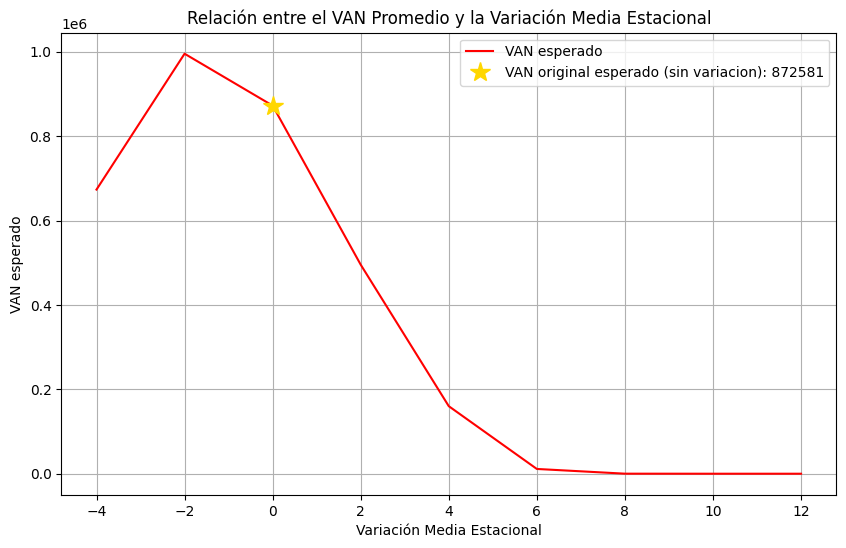

In [77]:
variaciones_θ = [-4, -2, 0, 2, 4, 6, 8, 10, 12]
VAN_media_estacional = []

# Calcular VAN para cada variación
for variacion in variaciones_θ:
    caminos = generar_vientos(N, T, variacion)
    VAN_dadas_variaciones = VAN_esperado(k_optimo, N, T, caminos)[0]
    VAN_media_estacional.append(VAN_dadas_variaciones)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Variación Media Estacional': variaciones_θ,
    'VAN Promedio': VAN_media_estacional
})


# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(resultados['Variación Media Estacional'], resultados['VAN Promedio'], marker='', linestyle='-', color='lightgreen', label='VAN esperado')

# Añadir el punto dorado
plt.plot(0, VAN_media_estacional[2], '*', color='gold', markersize=15, label=f'VAN original esperado (sin variacion): {VAN_media_estacional[2]:.0f}')

# Configurar el gráfico
plt.title('Relación entre el VAN Promedio y la Variación Media Estacional')
plt.xlabel('Variación Media Estacional')
plt.ylabel('VAN esperado')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()
    

In [79]:
for i in range(1, 366):
    media = 16 + 2 * np.cos(2 * np.pi * i / 365)
    print(media)


17.999703678418232
17.99881480147941
17.997333632576954
17.995260610613173
17.992596349869217
17.989341639823042
17.98549744491548
17.981064904264446
17.976045331327395
17.97044021351212
17.964251211736002
17.95748015993383
17.95012906451439
17.942200103765902
17.933695627210554
17.9246181549083
17.91497037671008
17.904755151460794
17.893975506152152
17.882634635025696
17.870735898626297
17.85828282280635
17.845279097680976
17.831728576534573
17.817635274679006
17.803003368263767
17.787837193038513
17.772141243068276
17.755920169401776
17.739178778693223
17.72192203177799
17.70415504220262
17.685883074709565
17.66711154367714
17.647846011515107
17.628092187016435
17.607855923665642
17.587143217904295
17.565960207354127
17.54431316899833
17.52220851732155
17.499652802409138
17.476652708006213
17.453215049537132
17.42934677208592
17.405054948338314
17.380346776485943
17.35522957809338
17.329710795928573
17.303797991757424
17.277498844103054
17.25082114597049
17.22377280253745
17.19636182

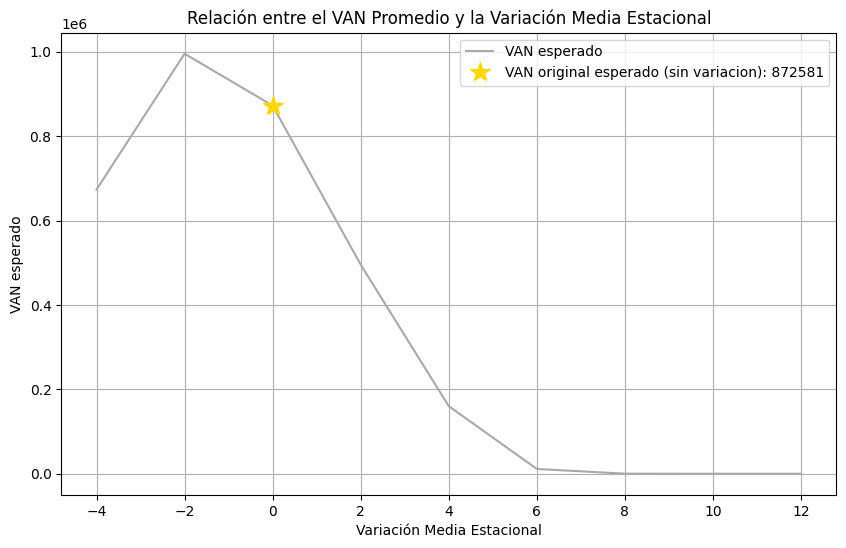

In [85]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(resultados['Variación Media Estacional'], resultados['VAN Promedio'], marker='', linestyle='-', color='darkgrey', label='VAN esperado')

# Añadir el punto dorado
plt.plot(0, VAN_media_estacional[2], '*', color='gold', markersize=15, label=f'VAN original esperado (sin variacion): {VAN_media_estacional[2]:.0f}')

# Configurar el gráfico
plt.title('Relación entre el VAN Promedio y la Variación Media Estacional')
plt.xlabel('Variación Media Estacional')
plt.ylabel('VAN esperado')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()
    

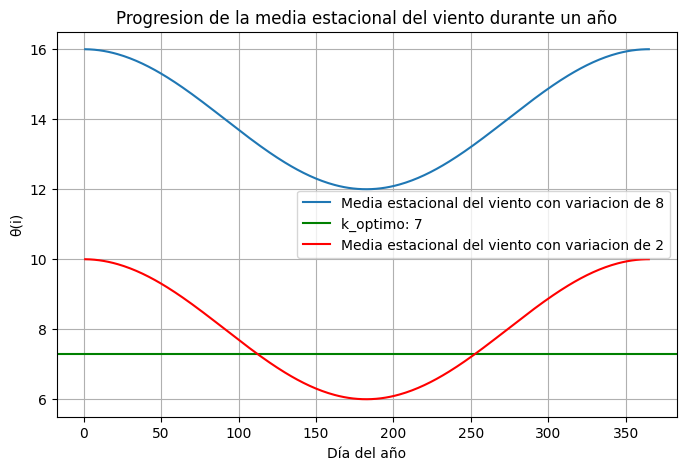

In [91]:
valores = np.arange(1, 366)
valor_media = media_estacional(valores, 8)

valor_media2 = media_estacional(valores, 2)

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.plot(valores, valor_media, label= 'Media estacional del viento con variacion de 8')
plt.axhline(y = k_optimo, color = 'green', label = f'k_optimo: {k_optimo:.0f}')
plt.plot(valores, valor_media2, label= 'Media estacional del viento con variacion de 2', color = 'red')
plt.title('Progresion de la media estacional del viento durante un año')
plt.xlabel('Día del año')
plt.ylabel('θ(i)')
plt.grid(True)
plt.legend()
plt.show()  